In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data_dir = './data/'
img_dir = './images/'

## Heart rate

In [62]:
def get_heart_stats(today, month, heart):
    mean_month_rate = int(np.mean(month['heartRate']))
    cur_rate = today['heartRate'].iloc[-1]
    min_rate = int(np.min(today['heartRate']))
    max_rate = int(np.max(today['heartRate']))
    mean_rate = int(np.mean(today['heartRate']))
    
    return mean_month_rate, cur_rate, min_rate, mean_rate, max_rate

In [63]:
def plot_heart(today, mean=None):
    
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    today.plot(x='time', y='heartRate', color='red', linewidth=0.8, ax=ax);
    ax.set_title('Heart rate', fontdict={'fontsize': 16})
    ax.set_xlabel('')
    ax.plot(today['time'], [mean for _ in range(len(today))], '--', linewidth=1);

In [64]:
def heart_main():
    heart = pd.read_csv(data_dir+'heartRate.csv')
    heart['time'] = pd.to_datetime(heart['time'].astype(str)).dt.time
    
    today = heart['date'].iloc[-1]
    today = heart[heart['date'] == today]
    month = heart['date'].unique()[-30:]
    month = heart[heart['date'].isin(month)]
    
    mean_month_rate, cur_rate, min_rate, mean_rate, max_rate = get_heart_stats(today, month, heart)
    
    plot_heart(today, mean_rate)
    
    out1 = f'Agerage heart rate for previous month: {mean_month_rate} bpm\n'
    out2 = f'Daily statistics:\nLast heart rate: {cur_rate} bpm\nMaximal heart rate: {max_rate} bpm\n\
Average heart rate: {mean_rate} bpm\nMinimal heart rate: {max_rate} bpm'
    
    return out1, out2

Agerage heart rate for previous month: 72 bpm

Daily statistics:
Last heart rate: 88 bpm
Maximal heart rate: 127 bpm
Average heart rate: 71 bpm
Minimal heart rate: 127 bpm


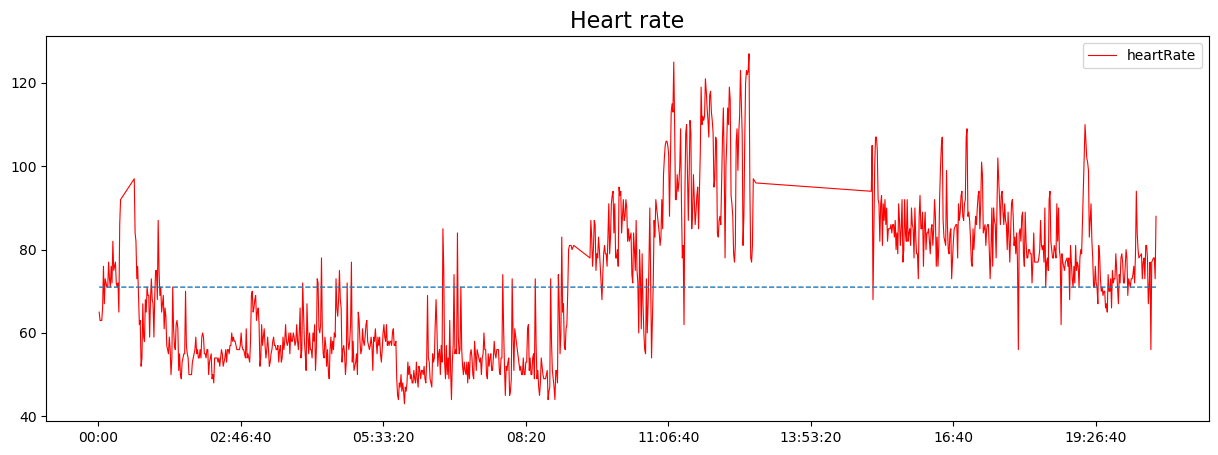

In [65]:
out = heart_main()

for i in out:
    print(i)

## Sleep

In [66]:
def convert_minutes(time):
    return float(f'{int(np.floor(time / 60))}.{round(time / 60 % 1 * 60)}')

In [67]:
def get_sleep_stats(today):
    deep = (convert_minutes(today['deepSleepTime']), today['deepSleepTime'] / today['totalSleepTime'] // 0.01)
    shallow = (convert_minutes(today['shallowSleepTime']), today['shallowSleepTime'] / today['totalSleepTime'] // 0.01)
    rem = (convert_minutes(today['REMTime']), today['REMTime'] / today['totalSleepTime'] // 0.01) 
    wake = today['wakeTime']
    
    return convert_minutes(today['totalSleepTime']), deep, shallow, rem, wake

In [68]:
def sleep_compare(month, today):
    total_diff = np.mean(month['totalSleepTime']) - today['totalSleepTime']
    deep_diff = np.mean(month['deepSleepTime']) - today['deepSleepTime']
    
    return convert_minutes(total_diff), convert_minutes(deep_diff)

In [80]:
def plot_sleep_today(today):
    stats = [today['deepSleepTime'], today['shallowSleepTime'], today['REMTime']]
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    plt.pie(stats, labels = ['Deep sleep', 'Shallow sleep', 'REM'], autopct='%.2f%%')
    plt.title(f'You slept {convert_minutes(today["totalSleepTime"])} hours:', fontdict={'fontsize': 16})
    plt.savefig(img_dir + 'sleep.png')

In [216]:
def plot_sleep_month(month):
    x_axis = month['stop'].apply(lambda x: x.split(' ')[0][5:])
    
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    plt.bar(x_axis, month['totalSleepTime'].apply(lambda x: convert_minutes(x)), color='#42b2d4')
    ax.set_xticks([x if i % 2 == 0 else '' for i, x in enumerate(x_axis)])
    
    mean = convert_minutes(np.mean(month['totalSleepTime']))
    ax.plot(x_axis, [mean for _ in range(len(month))], '--', linewidth=1, color='red')
    ax.set_title('Last month sleeps', fontdict={'fontsize': 16})
    ax.set_ylabel('Hours', fontdict={'fontsize': 14})

In [217]:
def sleep_main():
    sleep = pd.read_csv(data_dir+'sleep.csv')
    sleep = sleep[sleep.columns[:7]]
    
    today = sleep.iloc[-1]
    month = sleep.iloc[-30:]
    
    total, deep, shallow, rem, wake = get_sleep_stats(today)
    out1 = f'Your last sleep:\nTotal sleep time: {total} hours\
\nDeep sleep: {deep[0]} hour is {deep[1]}% of total sleep time\
\nShallow sleep: {shallow[0]} hour is {shallow[1]}% of total sleep time\
\nREM phase: {rem[0]} hour is {rem[1]}% of total sleep time\
\nWake period: {wake} minutes'
    
    total_diff, deep_diff = sleep_compare(month, today)
    out2 = f'\nThis night you slept {abs(total_diff)} hours {"more" if total_diff >= 0 else "less"} than last month average, and your deep sleep was \
{abs(deep_diff)} hours {"longer" if deep_diff >= 0 else "shorter"}'
    
    plot_sleep_today(today)
    plot_sleep_month(month)
    
    return out1, out2

Your last sleep:
Total sleep time: 7.45 hours
Deep sleep: 0.54 hour is 11.0% of total sleep time
Shallow sleep: 5.2 hour is 68.0% of total sleep time
REM phase: 1.31 hour is 19.0% of total sleep time
Wake period: 0 minutes

This night you slept 1.49 hours less than last month, and your deep sleep was 0.22 hours longer


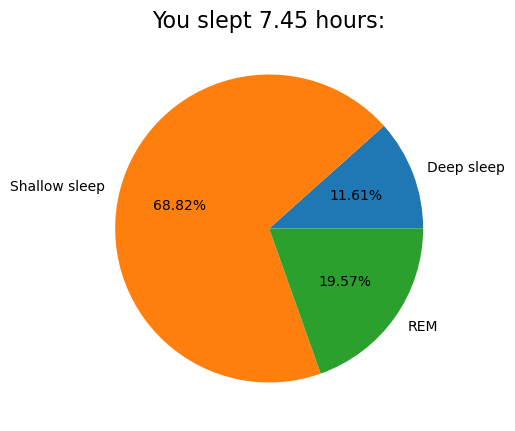

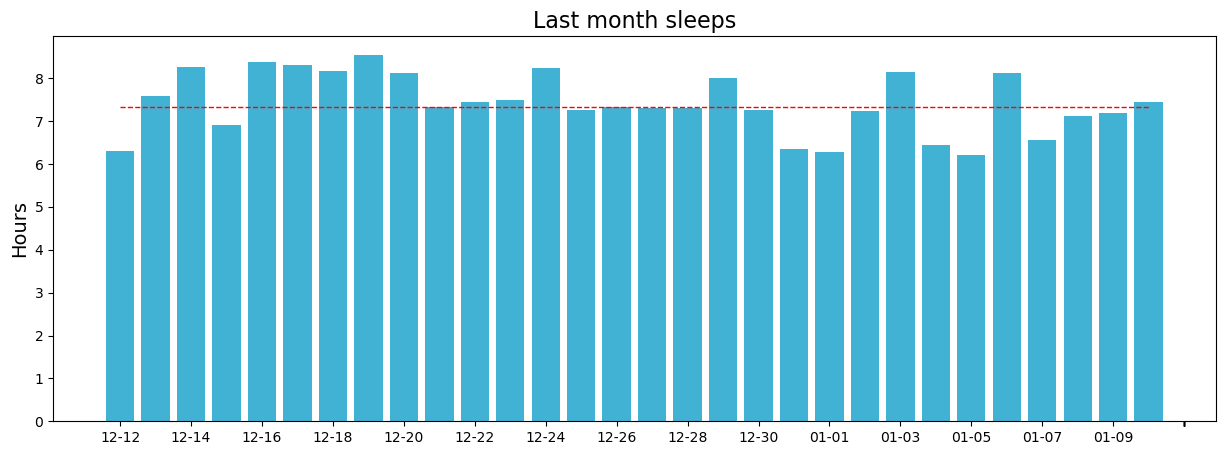

In [218]:
out = sleep_main()

for i in out:
    print(i)

## Activities

In [248]:
def plot_activity_month(month):
    x_axis = month['date'].apply(lambda x: x[5:])
    
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    plt.bar(x_axis, month['steps'], color='#62d1ae')
    ax.set_xticks([x if i % 2 == 0 else '' for i, x in enumerate(x_axis)])
    
    mean = np.mean(month['steps'])
    ax.plot(x_axis, [mean for _ in range(len(month))], '--', linewidth=1, color='red')
    ax.set_title('Last month steps', fontdict={'fontsize': 16})
    ax.set_ylabel('Steps', fontdict={'fontsize': 14})

In [249]:
def activity_main():
    activity = pd.read_csv(data_dir+'activityDaily.csv')
    
    today = activity.iloc[-1]
    month = activity.iloc[-30:]
    
    out1 = f'Today you walked {today["steps"]} steps, which is {today["distance"]/1000} km, and burned {today["calories"]} calories'
    
    diff = int(np.mean(month['steps'])) - today['steps']
    out2 = f'\nIt is {diff} steps {"bigger" if diff >= 0 else "smaller"} than last month average:' 
    
    plot_activity_month(month)
    
    return out1, out2

Today you walked 6675 steps, which is 4.736 km, and burned 158 calories

It is 1052 steps bigger than last month average:


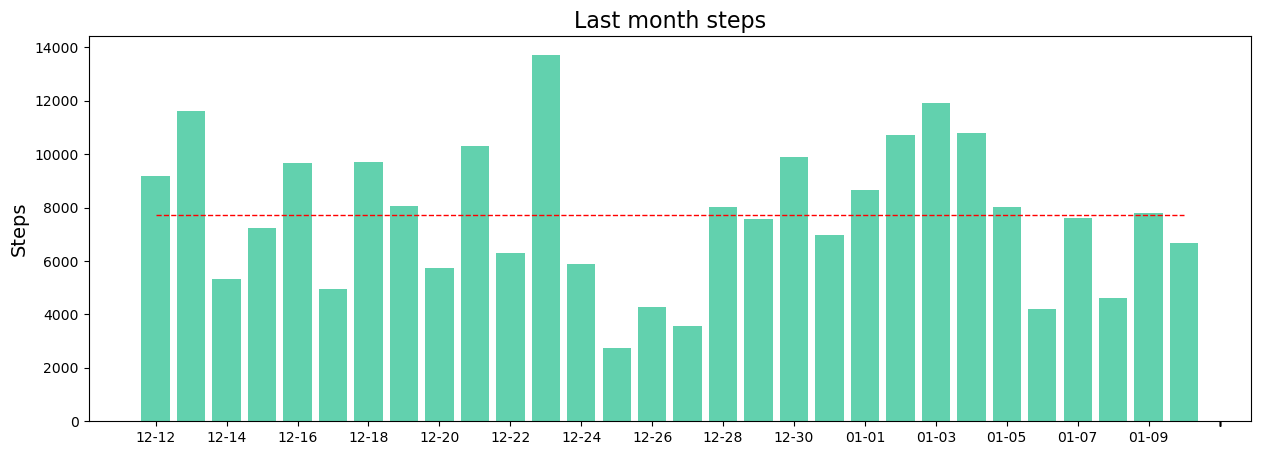

In [250]:
out = activity_main()

for i in out:
    print(i)